# Student Performace in Secondary Education
This is the main project for Week-5 of this course. The dataset is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance) (originating from the University of Minho, GuimarÃ£es, Portugal). You can download the dataset from the link above.


# Objectives:
1. Data set explanation.
2. Data Preparation for Classification and Regression.
3. Defining Classification and Regression models.
4. Models Evaluation.
5. Error Calculation.

## Additional Requirements:
1. pip install xgboost

# Data Set Information:

This data approaches student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In <mark> [Cortez and Silva, 2008] </mark>, the two datasets were modeled under binary/five-level classification and regression tasks. <mark>"In this notebook, I use one subject containg dataset i.e; Math"</mark>. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)

In [1]:
# Importing Libraries

import numpy as np  
import pandas as pd
from collections import defaultdict
import sklearn
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The purpose of this dataset is to predict G3 (final grade) using G1, G2(period grades) and other attributes.

Below is the dataset description from the UCI Machine Learning Repository. 

# Attributes for student-mat.csv (Math course) dataset:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)


2 sex - student's sex (binary: "F" - female or "M" - male)


3 age - student's age (numeric: from 15 to 22)


4 address - student's home address type (binary: "U" - urban or "R" - rural)


5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)


6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)


7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)


9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")


10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")


11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")


12 guardian - student's guardian (nominal: "mother", "father" or "other")


13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)


14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)


16 schoolsup - extra educational support (binary: yes or no)


17 famsup - family educational support (binary: yes or no)


18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)


19 activities - extra-curricular activities (binary: yes or no)


20 nursery - attended nursery school (binary: yes or no)


21 higher - wants to take higher education (binary: yes or no)


22 internet - Internet access at home (binary: yes or no)


23 romantic - with a romantic relationship (binary: yes or no)


24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)


25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)


26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)


27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)


28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


29 health - current health status (numeric: from 1 - very bad to 5 - very good)


30 absences - number of school absences (numeric: from 0 to 93)

# These grades are related with the course subject, Math:

31 G1 - first period grade (numeric: from 0 to 20)


31 G2 - second period grade (numeric: from 0 to 20)


32 G3 - final grade (numeric: from 0 to 20, output target)

Run the cells below to examine the dataset.

# Data Preparation

In [2]:
# Load student dataset

df = pd.read_csv('student/student-mat.csv', sep = ";")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


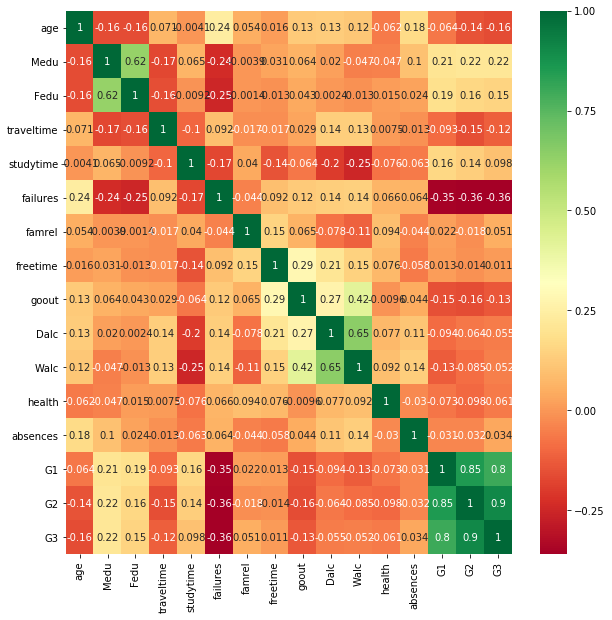

In [5]:
#get correlations of numerical features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Data Preparation for Classification

## Feature Selection 
Feature Selection for binary classification – pass if G3≥10, else fail.

In [9]:
df['bin_G3'] = 'na'
df.loc[(df.G3 >= 10), 'bin_G3'] = 'pass'
df.loc[(df.G3 < 10), 'bin_G3'] = 'fail'
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,bin_G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


Text(0.5, 1.0, 'Binary classification of student final grades')

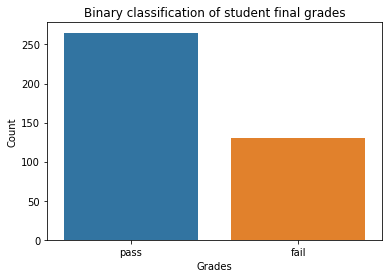

In [10]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'bin_G3', data=df, order=['pass','fail'])
ax = ax.set(ylabel="Count", xlabel = "Grades")
figure.grid(False)
plt.title('Binary classification of student final grades')

As we can see student pass rate is higher but no.of failing students is also substantially high reaching nearly 150.

In [11]:
# Encoding new feature as labels for this classification .
le = preprocessing.LabelEncoder()
df.bin_G3 = le.fit_transform(df.bin_G3)

In [12]:
X = df.drop(labels = ['bin_G3','G3'],axis=1)
y = df.bin_G3

In [13]:
# Train test splitting in 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [15]:
X_train.shape

(276, 58)

## Feature Importance
In this project, I will try Feature importance using two models: Extra tree and XGboost classifier. 
Extra tree is an inbuilt class that comes with Tree Based Classifiers. Both have been used here to extract top features. 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


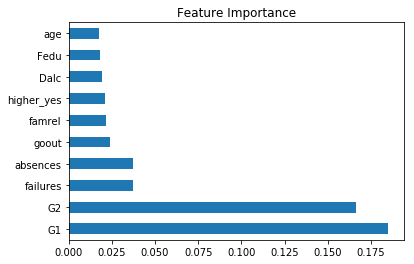

In [16]:
def extclass(x,y):
    model = ExtraTreesClassifier()
    model.fit(x,y)
    
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Feature Importance')
    plt.show()
   
    return model

etcmodel = extclass(X_train,y_train)

From the graph above we can see that G1 and G2 grades are the most significant featueres and other than academics(grades, absences, study time) domestic features such as parents education and student roaming features affect his final grade 'G3'.

XGBoost Train data Score : 1.0 , Validation data Score : 0.9327731092436975


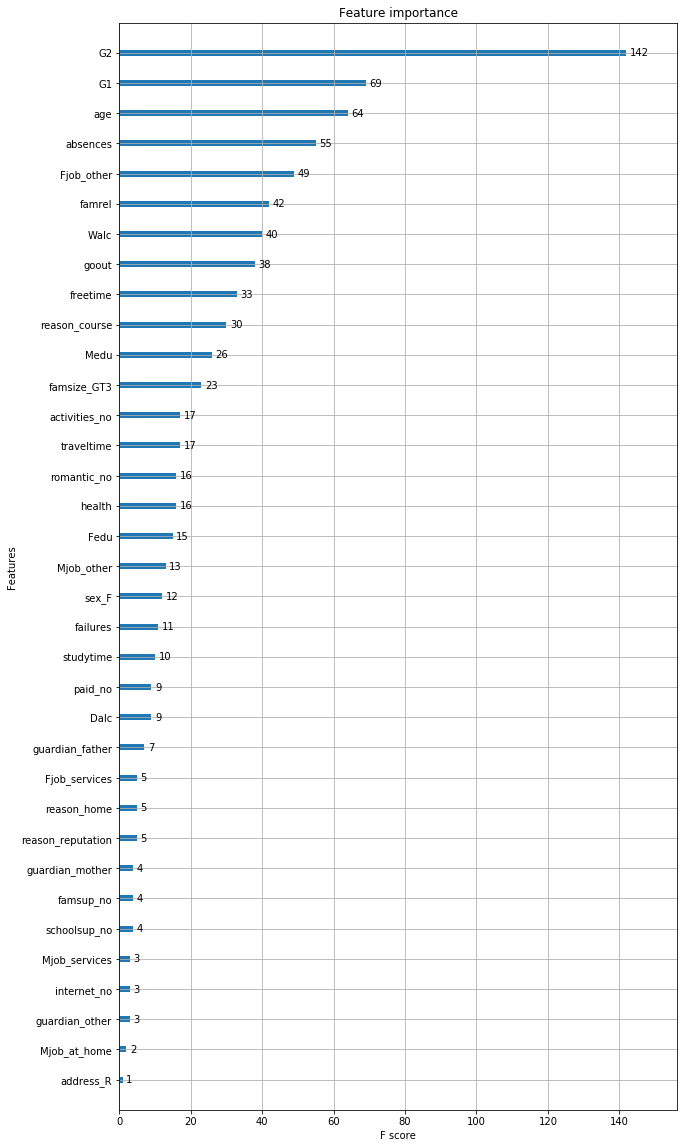

In [17]:
def xgbclass(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=100)
    mf = model.fit(x_train,y_train)
#     y_pred=model.predict(x_val)
#     y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(mf, ax=ax)

    plt.show()
    return model

xgmodel = xgbclass(X_train,y_train,X_test,y_test)

From this graph we can see the impact features on the validation/testing set. Here G2,G1 are the most affecting features, then some of the domestic features such as Father education,health,relation affect his final grade 'G3'. 

## Model Evaluation (Classification)


In [39]:
def modelscores(model,Model):
    classes = ['pass','fail']
    y_pred = model.predict(X_test)
    
#     Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)
    
    
    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')
    
    print('\n',classification_report(y_test,y_pred,target_names=classes))
    
    print("\nModel Training Score" , ":" , model.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , model.score(X_test, y_test))

In [40]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

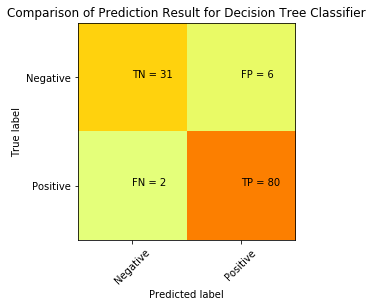

Accuracy of the Model Decision Tree Classifier 93.3%

               precision    recall  f1-score   support

        pass       0.94      0.84      0.89        37
        fail       0.93      0.98      0.95        82

    accuracy                           0.93       119
   macro avg       0.93      0.91      0.92       119
weighted avg       0.93      0.93      0.93       119


Model Training Score : 0.9311594202898551 , Cross Validation Score : 0.9327731092436975


In [43]:
# Classification using Decision tree.
Model = "Decision Tree Classifier"

tree = DecisionTreeClassifier(min_samples_leaf=17)
dtcmodel= tree.fit(X_train, y_train)

modelscores(dtcmodel,Model)


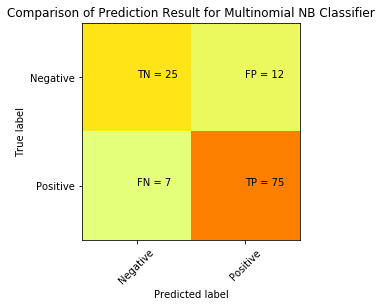

Accuracy of the Model Multinomial NB Classifier 84.0%

               precision    recall  f1-score   support

        pass       0.78      0.68      0.72        37
        fail       0.86      0.91      0.89        82

    accuracy                           0.84       119
   macro avg       0.82      0.80      0.81       119
weighted avg       0.84      0.84      0.84       119


Model Training Score : 0.8369565217391305 , Cross Validation Score : 0.8403361344537815


In [44]:
# Classification using Naive Bayes for multinomial models
Model = "Multinomial NB Classifier"

clf = MultinomialNB()
nbmodel= clf.fit(X_train, y_train)

modelscores(nbmodel,Model)

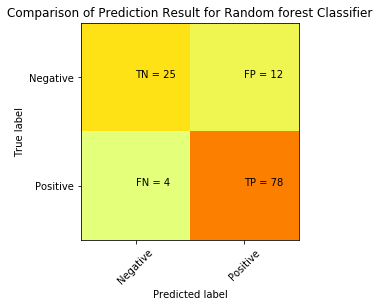

Accuracy of the Model Random forest Classifier 86.6%

               precision    recall  f1-score   support

        pass       0.86      0.68      0.76        37
        fail       0.87      0.95      0.91        82

    accuracy                           0.87       119
   macro avg       0.86      0.81      0.83       119
weighted avg       0.87      0.87      0.86       119


Model Training Score : 0.9927536231884058 , Cross Validation Score : 0.865546218487395


In [45]:
# Classification using Random forest classifier
Model = "Random forest Classifier"

clf = RandomForestClassifier(n_estimators=34, min_samples_leaf=2)
rfmodel= clf.fit(X_train, y_train)

modelscores(rfmodel,Model)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


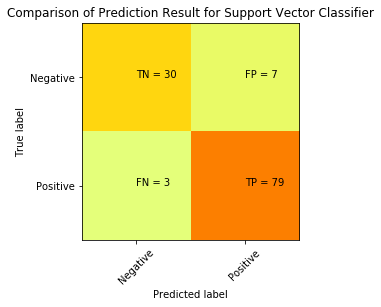

Accuracy of the Model Support Vector Classifier 91.6%

               precision    recall  f1-score   support

        pass       0.91      0.81      0.86        37
        fail       0.92      0.96      0.94        82

    accuracy                           0.92       119
   macro avg       0.91      0.89      0.90       119
weighted avg       0.92      0.92      0.91       119


Model Training Score : 0.967391304347826 , Cross Validation Score : 0.9159663865546218


In [46]:
# Classification using SVC
Model = "Support Vector Classifier"

svc = SVC()
svcmodel= svc.fit(X_train, y_train)

modelscores(svcmodel,Model)

# Data Preparation for Regression
Since Data has to be continuous in Regression, I used 'G3' feature as labels to predict its results.

In [47]:
df = df.drop(['bin_G3'], axis = 1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Text(0.5, 1.0, 'Student final grades')

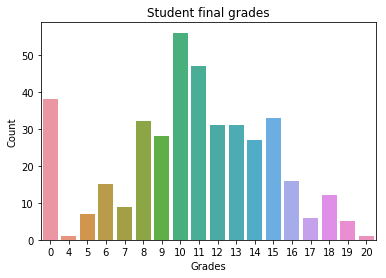

In [48]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'G3', data=df)
ax = ax.set(ylabel="Count", xlabel = "Grades")
figure.grid(False)
plt.title('Student final grades')

## Encoding Categorical variables

In [49]:
objlist = df.select_dtypes(include='object').columns
objlist

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [50]:
le = preprocessing.LabelEncoder()
df['school']=pd.DataFrame(le.fit_transform(df.school))
df['sex']=pd.DataFrame(le.fit_transform(df.sex))
df['address']=pd.DataFrame(le.fit_transform(df.address))
df['famsize']=pd.DataFrame(le.fit_transform(df.famsize))
df['Pstatus']=pd.DataFrame(le.fit_transform(df.Pstatus))
df['Mjob']=pd.DataFrame(le.fit_transform(df.Mjob))
df['Fjob']=pd.DataFrame(le.fit_transform(df.Fjob))
df['reason']=pd.DataFrame(le.fit_transform(df.reason))
df['guardian']=pd.DataFrame(le.fit_transform(df.guardian))
df['schoolsup']=pd.DataFrame(le.fit_transform(df.schoolsup))
df['famsup']=pd.DataFrame(le.fit_transform(df.famsup))
df['paid']=pd.DataFrame(le.fit_transform(df.paid))
df['activities']=pd.DataFrame(le.fit_transform(df.activities))
df['nursery']=pd.DataFrame(le.fit_transform(df.nursery))
df['higher']=pd.DataFrame(le.fit_transform(df.higher))
df['internet']=pd.DataFrame(le.fit_transform(df.internet))
df['romantic']=pd.DataFrame(le.fit_transform(df.romantic))
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [51]:
# Standardization
scaler=StandardScaler()
scaler.fit(df.drop('G3',axis=1))
scaled_features=scaler.transform(df.drop('G3',axis=1))
dataset_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
dataset_scaled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038


In [52]:
# Splitting dataset into train and test sets

X = df.drop(labels = ['G3'],axis=1)    #independent columns
y=df['G3']     #target column i.e final grade

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
X_train.shape
# y_train.shape

(276, 32)

## Error Calculation and Graph Plotting

In [53]:
def rmscores(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
    rmse_scores = np.sqrt(-scores)
    mean = rmse_scores.mean()
#     #combined rmse value
# rss=((y_test-y_pred)**2).sum()
# mse=np.mean((y_test-y_pred)**2)
# print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))
    print("Root mean square error: ",mean)

In [54]:
def graphs(model):
    #to see the relationship between the predicted values using scattered graph  
    plt.scatter(y_test,y_pred)
    plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'r', alpha=0.5)
    plt.xlabel('Observed')
    plt.ylabel('Predicted')

## Model training and Evaluation

Model : Random forest Regressor
Root mean square error:  1.8624191556697387


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


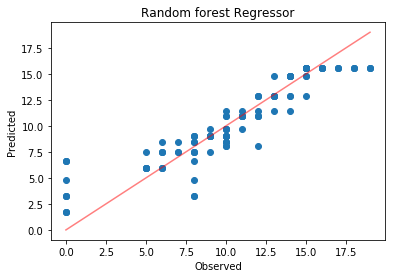

In [55]:
# Random Forest Regressor
print("Model : Random forest Regressor")

regr = RandomForestRegressor(max_depth=2, random_state=0)
rgrmodel = regr.fit(X_train, y_train)

#predict the test result
y_pred=rgrmodel.predict(X_test)
# print(y_test.shape)
plt.title('Random forest Regressor')
graphs(rgrmodel)
rmscores(rgrmodel)

Model : Linear Regressor
Root mean square error:  1.7844463379416968


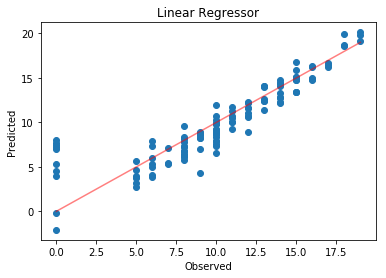

In [56]:
# Linear Regressor
print("Model : Linear Regressor")

lnr = LinearRegression()
lnrmodel = lnr.fit(X_train, y_train)

#predict the test result
y_pred=lnrmodel.predict(X_test)
# print(y_test.shape)
plt.title('Linear Regressor')
graphs(lnrmodel)
rmscores(lnrmodel)

Model : Decision tree Regressor
Root mean square error:  1.9487467976467108


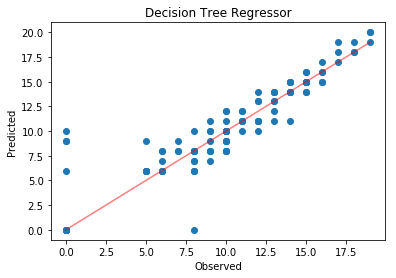

In [57]:
# Decision tree Regressor
print("Model : Decision tree Regressor")

dtr = DecisionTreeRegressor(random_state = 0)  
dtrmodel = dtr.fit(X_train,y_train)

#predict the test result
y_pred=dtrmodel.predict(X_test)
# print(y_test.shape)
plt.title('Decision Tree Regressor')
graphs(dtrmodel)
rmscores(dtrmodel)

# Comments:
1. From the Feature importance we can see 'G2' affects the most in his final grade 'G3'.
2. Out of Classification models Decision tree Classifier has best Validation score. So it would be preferred.
3. Out of Regression models Linear regressor has least RMSE error, so it is preferred.